# EDA for 311 Calgary Dataset

## via import of CSV file downloaded Jan 23 2024

### Imports 
---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [13]:
service_request_df = pd.read_csv('./Data/service_requests_cleaned.csv')

In [16]:
# converting data types for dates
service_request_df['requested_date'] = pd.to_datetime(service_request_df['requested_date'])
service_request_df['updated_date'] = pd.to_datetime(service_request_df['updated_date'])
service_request_df['closed_date'] = pd.to_datetime(service_request_df['closed_date'])

In [17]:
service_request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582795 entries, 0 to 3582794
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   service_request_id  object        
 1   requested_date      datetime64[ns]
 2   updated_date        datetime64[ns]
 3   closed_date         datetime64[ns]
 4   status_description  object        
 5   source              object        
 6   service_name        object        
 7   agency_responsible  object        
 8   comm_code           object        
 9   comm_name           object        
 10  location_type       object        
 11  longitude           float64       
 12  latitude            float64       
 13  point               object        
dtypes: datetime64[ns](3), float64(2), object(9)
memory usage: 382.7+ MB


## Exploratory Analysis
---

### Question: How may service requests are submitted on a yearly basis?
#### Has the volume of requests increased over time?

In [18]:
# count number of rows grouped by year based on request date
service_request_df['requested_date'].dt.year.value_counts().sort_index()

2017    506800
2018    520374
2019    496547
2020    506143
2021    480853
2022    498130
2023    546144
2024     27804
Name: requested_date, dtype: int64

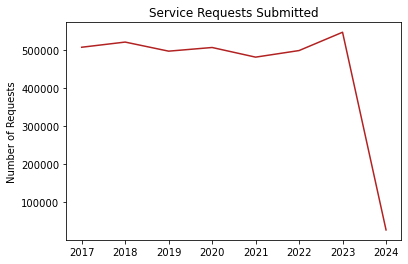

In [20]:
service_request_df['requested_date'].dt.year.value_counts().sort_index()\
.plot(c='firebrick')

plt.title('Service Requests Submitted')
plt.ylabel('Number of Requests');

### What type of service (service_name) is most frequently submitted?

In [23]:
# listing the top 10 service_name by count quantity
service_request_df['service_name'].value_counts().head(10)

Finance - Property Tax Account Inquiry                    175717
WRS - Cart Management                                     136688
Finance - ONLINE TIPP Agreement Request                   132530
CBS Inspection - Electrical                                98024
Bylaw - Snow and Ice on Sidewalk                           92633
Parks - Tree Concern - WAM                                 86521
Roads - Snow and Ice Control                               78403
WRS - Waste - Residential                                  73780
CBS Inspection - Residential Improvement Project - RIP     69802
Finance - TIPP Agreement Request                           68013
Name: service_name, dtype: int64

Text(0.5, 0, 'Requests Submitted')

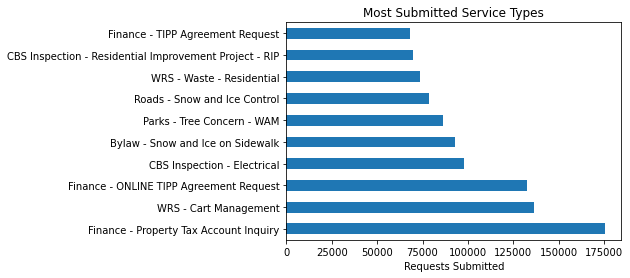

In [24]:
service_request_df['service_name'].value_counts().head(10)\
.plot(kind='barh')

plt.title('Most Submitted Service Types')
plt.xlabel('Requests Submitted')

### Sources
#### How are requests being submitted (source)?

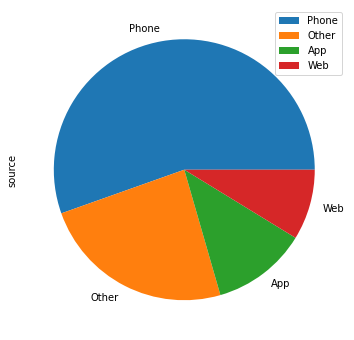

In [26]:
service_request_df['source'].value_counts().plot(kind='pie', figsize=(6,6))

plt.legend();

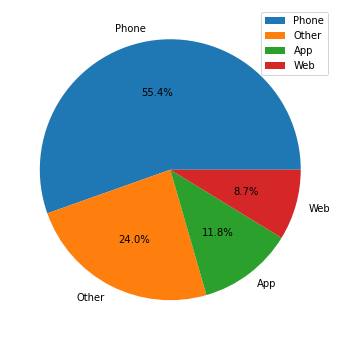

In [28]:
plt.figure(figsize=(6,6))

pie_labels = service_request_df['source'].value_counts().index

plt.pie(service_request_df['source'].value_counts(), labels=pie_labels, autopct='%1.1f%%')

plt.legend();

#### Has use of web/mobile app increased over time?

In [31]:
# Extract year from requested_date
service_request_df['requested_year'] = service_request_df['requested_date'].dt.year

# Group by source and requested_year, then count the service_request_id
grouped_data = service_request_df.groupby(['source', 'requested_year'])['service_request_id'].count().reset_index()

grouped_data

,source,requested_year,service_request_id
0,App,2017,29035
1,App,2018,41407
2,App,2019,45791
3,App,2020,53609
4,App,2021,65426
5,App,2022,80198
6,App,2023,101930
7,App,2024,4967
8,Other,2017,59000
9,Other,2018,64167


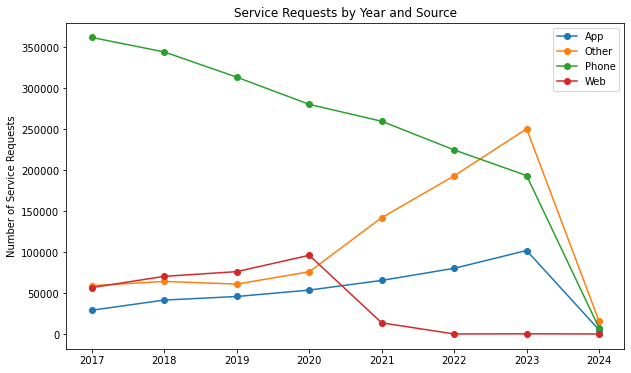

In [32]:
# plot data
# Plotting
sources = grouped_data['source'].unique()

plt.figure(figsize=(10, 6))
# making lines for each source
for source in sources:
    source_data = grouped_data[grouped_data['source'] == source]
    plt.plot(source_data['requested_year'], source_data['service_request_id'], marker='o', label=source)

plt.title('Service Requests by Year and Source')
plt.ylabel('Number of Service Requests')
plt.legend();

### Municipal Agencies
#### Which department (agency_responsible) handles the most requests?

In [33]:
service_request_df['agency_responsible'].value_counts()

TRAN - Roads                            510091
CS - Calgary Community Standards        496321
PD - Calgary Building Services          456527
UEP - Waste and Recycling Services      383892
CFOD - Finance                          361722
                                         ...  
Environmental and Safety Management          7
Fleet and Inventory                          4
Z-311 CSR System Internal Management         4
LLSS - City Manager's Office                 3
LL - Corporate Security                      3
Name: agency_responsible, Length: 82, dtype: int64

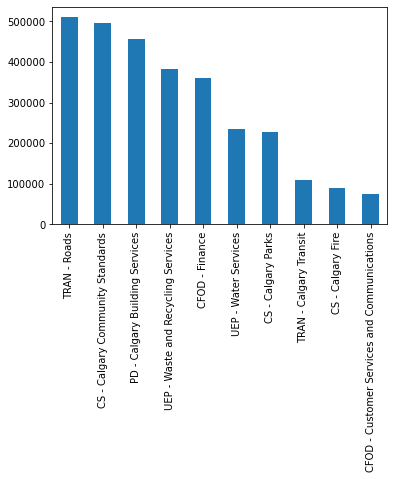

In [35]:
service_request_df['agency_responsible'].value_counts().head(10)\
.plot(kind='bar');